<a href="https://colab.research.google.com/github/phamvandatspkt/nhandangmonan/blob/main/nh%E1%BA%ADn_di%E1%BB%87n_khu%C3%B4n_m%E1%BA%B7t.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[]
[]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import glob
import cv2
import numpy as np

x_train = []
x_test = []
y_train = []
y_test = []

dem = 0
for imgpath in glob.glob('/content/drive/MyDrive/BanTri/BanTri/*.bmp'):
  n = cv2.imread(imgpath)

  if dem%10 == 0:
    x_test.append(n)
    y_test.append(0)
  else:
    x_train.append(n)
    y_train.append(0)
  dem += 1
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)

y_test = np.array(y_test)
y_train = list(y_train)

In [ ]:

print(y_train)
print(y_test)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0 0 0 0 0 0 0]


0


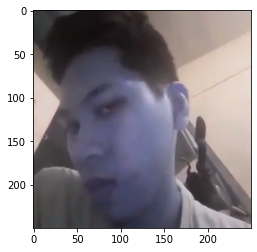

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_test[6])
print(y_test[6])

In [ ]:
print(x_train.shape)
#print(y_train.shape)
print(y_test.shape)
print(x_test.shape)

(61, 250, 250, 3)
(7,)
(7, 250, 250, 3)


In [ ]:
a = np.array([[1], [2], [3], [4]])
print(a)
m = np.delete(a, 2)
print(m)
a = list(a)
print(a)

[[1]
 [2]
 [3]
 [4]]
[1 2 4]
[array([1]), array([2]), array([3]), array([4])]


In [ ]:
from keras.utils.np_utils import to_categorical

x_train = x_train.reshape(61, 187500)
x_test = x_test.reshape(7, 187500)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Chuyen anh trang den
x_train /= 255
x_test /= 255

# ...to_categorical(y_train, 3) với 3: số phần tử output
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Dense, Activation, BatchNormalization, Dropout
from keras.models import Sequential
model = Sequential()
model.add(Dense(512, kernel_initializer='normal', activation='relu', input_shape=(187500,)))  # 784: số tín hiệu đầu vào
model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2)) # Không cần Dropout cũng đc :D?
model.add(Dense(1, activation='softmax')) 
# model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=61, epochs=10, verbose=1, validation_data=(x_test, y_test))  # verbose = 0: trong qua trinh hoc ko hien thi ra man hinh, = 1: hien thi ..., = 2: hien thi 1/500:..., 2/500:...

Epoch 1/10
1/1 [==============================] - 4s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_ac

In [ ]:
model.save('BT Nhan dien khuon mat ANN.h5')

In [ ]:
from google.colab import files
upload = files.upload()

Saving Nguyen_0005.bmp to Nguyen_0005.bmp


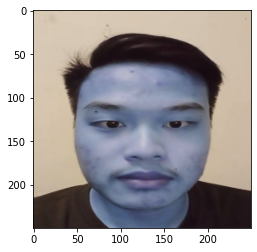

In [ ]:
import cv2
img = cv2.imread(r'Nguyen_0005.bmp')
plt.imshow(img)

(250, 250, 3)


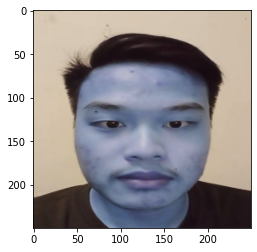

In [ ]:
img_re = cv2.resize(img, (250, 250))
plt.imshow(img_re)
print(img_re.shape)

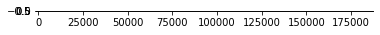

In [ ]:
x_test_c = img_re.reshape(-1, 187500) 
x_test_c = x_test_c.astype('float32')
x_test_c /= 255
plt.imshow(x_test_c)

In [ ]:
y_pred = model.predict(x_test_c)
# print(y_test)
# acc_num_class0 = y_pred[0]
# acc_num_class1 = y_pred[1]
# np.max
print(y_pred)

[[1.]]


In [ ]:
score = model.evaluate(x_test_c, y_pred, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0
Test accuracy: 1.0
